## Observations and Insights 

Observations about this experiment are: 
- The experiment was quite fair and consistent. There was a even about females to males. The drugs performed similarly meaning that not one drug stuck out as an outlier( extreme performance) 
- There seems to be a trend of the heavier the mouse is, the bigger the mass of the tumor it is. 
- Comparing just the four drugs (capomulin,ramicane,infubinol,ceftamin) infubinol and ceftamin performed better as the avergae tumor decreased more. But infubinol does have an outlier so that is something to look at in terms of potential side effects cause by or from the drug. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data = mouse_metadata[["Mouse ID","Drug Regimen","Sex","Age_months","Weight (g)"]].merge(study_results[["Mouse ID","Timepoint","Tumor Volume (mm3)","Metastatic Sites"]],on = "Mouse ID",  
                                     how = "left")
# Display the data table for preview
merge_data.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
number_mice = mouse_metadata["Mouse ID"].count()
number_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_items = merge_data[merge_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_items

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_id_duplicate_items = merge_data[merge_data.duplicated(['Mouse ID'])]
mouse_id_duplicate_items


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df = merge_data.drop_duplicates('Mouse ID')
new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df_number_mice = new_df["Mouse ID"].count()
clean_df_number_mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean_stat = round(merge_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(),3)
median_stat = round(merge_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median(),3)
variance_stat = round(merge_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(),3)
standard_deviation_stat = round(merge_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(),3)
SEM_stat = round(merge_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem(),3)

stat_summary_df = pd.DataFrame({"Mean":mean_stat,"Median":median_stat,"Variance":variance_stat,"STD":standard_deviation_stat
                               ,"SEM":SEM_stat})
stat_summary_df

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

merged_summary_2 = merge_data.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
merged_summary_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

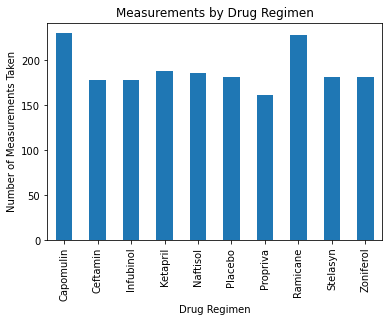

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_group = merge_data.groupby("Drug Regimen")
per_regimen_count = regimen_group["Tumor Volume (mm3)"].count()

regimen_bar_chart = per_regimen_count.plot(kind="bar", title="Measurements by Drug Regimen")
regimen_bar_chart.set_xlabel("Drug Regimen")
regimen_bar_chart.set_ylabel("Number of Measurements Taken")

plt.show()

Text(0, 0.5, 'Number of Measurements Taken')

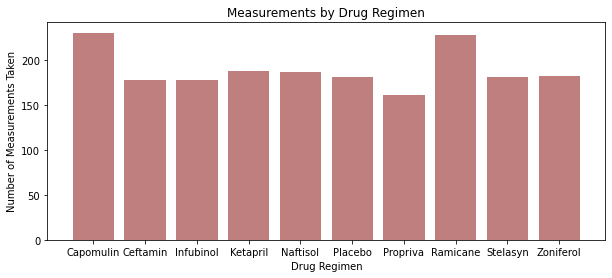

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimen_list = stat_summary_df.index.tolist()
per_regimen_count_list = (merge_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].count()).tolist()

plt.figure(figsize=(10,4))
plt.bar(regimen_list, per_regimen_count_list, color="maroon",alpha=0.5, align="center")


plt.title("Measurements by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements Taken")

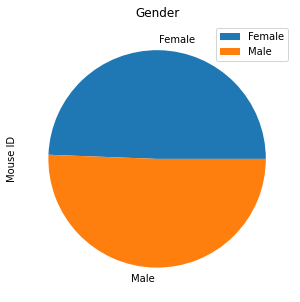

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_groups = merge_data.groupby("Sex").count()
gender_groups

sum_gender_pie = gender_groups.plot(kind="pie", y='Mouse ID', title="Gender",figsize=(5, 5))
plt.show()



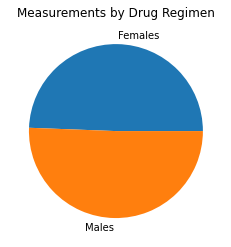

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_list = ["Females","Males"]
gender_count_list = (merge_data.groupby(["Sex"])['Mouse ID'].count()).tolist()

plt.figure(figsize=(10,4))
plt.pie(gender_count_list, labels =gender_list )


plt.title("Measurements by Drug Regimen")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = merge_data.loc[merge_data["Drug Regimen"] == "Capomulin",:]
ramicane_df = merge_data.loc[merge_data["Drug Regimen"] == "Ramicane", :]
infubinol_df = merge_data.loc[merge_data["Drug Regimen"] == "Infubinol", :]
ceftamin_df = merge_data.loc[merge_data["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
#capomulin
capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_vol = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin_vol, merge_data, on=("Mouse ID","Timepoint"),how="left")

cap_tumors = capomulin_merge["Tumor Volume (mm3)"]

quartiles =cap_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"Lower quartile of Capomulin tumors: {lowerq}")
print(f"Upper quartile of Capomulin tumors: {upperq}")
print(f"Interquartile range of Capomulin tumors: {iqr}")
print(f"Median of Capomulin tumors: {quartiles[0.5]} ")

low = lowerq - (1.5*iqr)
upper = upperq + (1.5*iqr)

print(f"Values below {low} could be outliers.")
print(f"Values above {upper} could be outliers.")

Lower quartile of Capomulin tumors: 32.37735684
Upper quartile of Capomulin tumors: 40.1592203
Interquartile range of Capomulin tumors: 7.781863460000004
Median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [15]:
#ramicane
ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_last)
ramicane_merge = pd.merge(ramicane_vol, merge_data, on=("Mouse ID","Timepoint"),how="left")

ram_tumors = ramicane_merge["Tumor Volume (mm3)"]

quartiles =ram_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"Lower quartile of Ramicane tumors is: {lowerq}")
print(f"Upper quartile of Ramicane tumors is: {upperq}")
print(f"Interquartile range of Ramicane tumors is: {iqr}")
print(f"Median of Ramicane tumors is: {quartiles[0.5]} ")

low = lowerq - (1.5*iqr)
upper = upperq + (1.5*iqr)

print(f"Values below {low} could be outliers.")
print(f"Values above {upper} could be outliers.")

Lower quartile of Ramicane tumors is: 31.56046955
Upper quartile of Ramicane tumors is: 40.65900627
Interquartile range of Ramicane tumors is: 9.098536719999998
Median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [16]:
#infubinol
infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_vol, merge_data, on=("Mouse ID","Timepoint"),how="left")

infubinol_tumors = infubinol_merge["Tumor Volume (mm3)"]

quartiles =infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"Lower quartile of Infubinol tumors is: {lowerq}")
print(f"Upper quartile of Infubinol tumors is: {upperq}")
print(f"Interquartile range of Infubinol tumors is: {iqr}")
print(f"Median of Infubinol tumors is: {quartiles[0.5]} ")

low = lowerq - (1.5*iqr)
upper = upperq + (1.5*iqr)


print(f"Values below {low} could be outliers.")
print(f"Values above {upper} could be outliers.")

Lower quartile of Infubinol tumors is: 54.04860769
Upper quartile of Infubinol tumors is: 65.52574285
Interquartile range of Infubinol tumors is: 11.477135160000003
Median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [17]:
#ceftamin
ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_vol, merge_data, on=("Mouse ID","Timepoint"),how="left")

ceftamin_tumors = ceftamin_merge["Tumor Volume (mm3)"]

quartiles = ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Lower quartile of treatment is: {lowerq}")
print(f"Upper quartile of temperatures is: {upperq}")
print(f"Interquartile range of temperatures is: {iqr}")
print(f"Median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

low = lowerq - (1.5*iqr)
upper = upperq + (1.5*iqr)

print(f"Values below {low} could be outliers.")
print(f"Values above {upper} could be outliers.")


Lower quartile of treatment is: 48.72207785
Upper quartile of temperatures is: 64.29983003
Interquartile range of temperatures is: 15.577752179999997
Median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


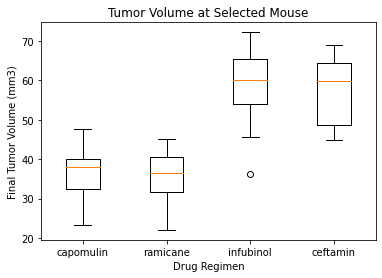

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot_data = [cap_tumors,ram_tumors,infubinol_tumors,ceftamin_tumors]
regimen= ['capomulin', 'ramicane', 'infubinol','ceftamin']

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(plot_data, labels=regimen, widths = 0.4)

plt.show()

## Line and Scatter Plots

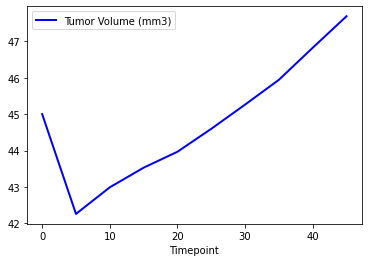

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_reg = merge_data.loc[merge_data["Drug Regimen"]=="Capomulin"]
#capomulin_reg = capomulin_reg.reset_index()
capomulin_reg_mouse = capomulin_reg.loc[capomulin_reg["Mouse ID"]=="i557"]

capomulin_reg_mouse = capomulin_reg_mouse.loc[ :,["Timepoint", "Tumor Volume (mm3)"]]
#capomulin_reg_mouse=capomulin_reg_mouse.reset_index(drop=True)
capomulin_reg_mouse.set_index("Timepoint").plot (linewidth=2, color="blue")

plt.show()

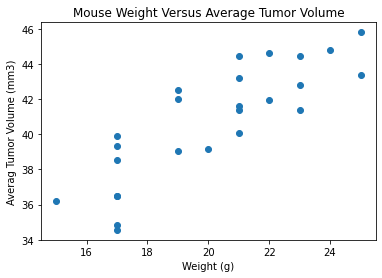

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
average =capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(average['Weight (g)'],average['Tumor Volume (mm3)'])
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation coefficient is 0.83
y = 0.09x + 42.72


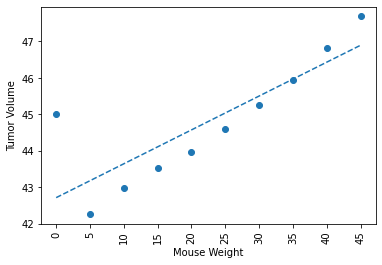

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = capomulin_reg_mouse.iloc[:,0]
tumor_volume = capomulin_reg_mouse.iloc[:,1]
correlation = st.pearsonr(mouse_weight,tumor_volume)
print(f"The correlation coefficient is {round(correlation[0],2)}")

cr_slope, cr_int, cr_r, cr_p, cr_std_err = st.linregress(mouse_weight, tumor_volume)
cr_fit = cr_slope*mouse_weight +cr_int 


plt.scatter(mouse_weight,tumor_volume)
plt.plot(mouse_weight,cr_fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')

line_eq = "y = " + str(round(cr_slope,2)) + "x + " + str(round(cr_int,2))
print (line_eq)
plt.show()

